## Wczytanie danych

In [23]:
import numpy as np
import pandas as pd
import lyricsgenius
import json
import requests
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
#%pip install stop-words
from stop_words import get_stop_words
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
genius = lyricsgenius.Genius("soOLiPdEPwYDC5ZwsK2Td_jDeG8ZS9FIdNSBnL5dEkfHUsvnjBje47xs6EWG8QJe")
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
r = requests.get('https://raw.githubusercontent.com/priad2020/songs/master/songs.json')
c = r.text
data = json.loads(c)
popList = data.get("pop")
rockList = data.get("rock")
rapList = data.get("rap")

In [3]:
def Songs(List):
    songs = []
    for i in List: 
        songs.append(genius.search_song(i).lyrics)
    return songs


In [5]:
popsongs = Songs(popList)

Searching for "Shape of You"...
Done.
Searching for "thank u, next"...
Done.
Searching for "The Hills"...
Done.
Searching for "God’s Plan"...
Done.
Searching for "Drunk in Love"...
Done.
Searching for "Bohemian Rhapsody"...
Done.
Searching for "Work from Home"...
Done.
Searching for "Too Good at Goodbyes"...
Done.
Searching for "Vogue"...
Done.
Searching for "7 rings"...
Done.
Searching for "Hotline Bling"...
Done.
Searching for "Closer"...
Done.
Searching for "Starboy"...
Done.
Searching for "Shallow"...
Done.
Searching for "Formation"...
Done.
Searching for "One Dance"...
Done.
Searching for "Perfect"...
Done.
Searching for "FRIENDS"...
Done.
Searching for "I’m the One"...
Done.
Searching for "Money Trees"...
Done.
Searching for "Hello"...
Done.
Searching for "Thrift Shop"...
Done.
Searching for "New Rules"...
Done.
Searching for "Poetic Justice"...
Done.
Searching for "White Iverson"...
Done.
Searching for "Love Yourself"...
Done.
Searching for "Can’t Hold Us"...
Done.
Searching for

In [6]:
rocksongs = Songs(rockList)

Searching for "I Can’t Drive 55"...
Done.
Searching for "Lit Up"...
Done.
Searching for "Frankenstein"...
Done.
Searching for "Carry On Wayward Son"...
Done.
Searching for "Higher"...
Done.
Searching for "I Believe In A Thing Called Love"...
Done.
Searching for "Turn Up The Radio"...
Done.
Searching for "Don’t Tell Me You Love Me"...
Done.
Searching for "Bullet With Butterfly Wings"...
Done.
Searching for "Aqualung"...
Done.
Searching for "Party Hard"...
Done.
Searching for "Would?"...
Done.
Searching for "Seventeen"...
Done.
Searching for "The Beautiful People"...
Done.
Searching for "Slither"...
Done.
Searching for "I Wanna Be Somebody"...
Done.
Searching for "Bring Me To Life"...
Done.
Searching for "Since You Been Gone"...
Done.
Searching for "Heaven And Hell"...
Done.
Searching for "Any Way You Want It"...
Done.
Searching for "Rebel Yell"...
Done.
Searching for "Feel Like Making Love"...
Done.
Searching for "Black Hole Sun"...
Done.
Searching for "Kiss Me Deadly"...
Done.
Searchin

In [7]:
rapsongs = Songs(rapList)

Searching for "Rap God"...
Done.
Searching for "Savage"...
Done.
Searching for "Bitch, Don’t Kill My Vibe"...
Done.
Searching for "HUMBLE."...
Done.
Searching for "Bad and Boujee"...
Done.
Searching for "Man’s Not Hot"...
Done.
Searching for "God’s Plan"...
Done.
Searching for "SICKO MODE"...
Done.
Searching for "Bodak Yellow"...
Done.
Searching for "XO TOUR Llif3"...
Done.
Searching for "1-800-273-8255"...
Done.
Searching for "In My Feelings"...
Done.
Searching for "SAD!"...
Done.
Searching for "Trap Queen"...
Done.
Searching for "Hotline Bling"...
Done.
Searching for "rockstar"...
Done.
Searching for "Mercy"...
Done.
Searching for "m.A.A.d city"...
Done.
Searching for "Killshot"...
Done.
Searching for "Starboy"...
Done.
Searching for "Jocelyn Flores"...
Done.
Searching for "Holy Grail"...
Done.
Searching for "One Dance"...
Done.
Searching for "Niggas in Paris"...
Done.
Searching for "Panda"...
Done.
Searching for "Look At Me!"...
Done.
Searching for "I’m the One"...
Done.
Searching f

## Obróbka danych

In [8]:
def songs(songs):
    words = []
    punctuation = ["!",",", ".",'"', ":", ";", "?" ,"(",")","—","–","-", "*","”","“","&"
                   "»","…","«","—","[","]","1","2","3","4"] 
    stopWords = get_stop_words('english')
    stopWords.append("pre-chorus")
    stopWords.append("prechorus")
    stopWords.append ("verse")
    stopWords.append("post-chorus")
    stopWords.append("postchorus")
    stopWords.append("weren't") 
    stopWords.append("is's")
    stopWords.append("that’s")
    for song in songs:
        song = song.lower()
        for sign in punctuation:
             song = song.replace(sign,"")
                
        w = ""            
        for word in song.split():
            if not(word in stopWords):
                word = word.replace("’","")
                word =word.replace("'","")
                word = lemmatizer.lemmatize(word)
                w += word + " "
        words.append(w)
                
    return  words

In [9]:
popwords = songs(popsongs)
rockwords = songs(rocksongs)
rapwords = songs(rapsongs)

## Podział danych na zbór uczący i testowy

In [10]:
def split(popwords,rockwords,rapwords):
    length_pop = len(popwords)
    lengthLern_pop = int(length_pop * 0.3)
    popwords_Learn = popwords[0:lengthLern_pop ]
    popwords_Test = popwords[lengthLern_pop +1:]

    length_rock = len(rockwords)
    lengthLern_rock = int(length_rock * 0.3)
    rockwords_Learn = rockwords[0:lengthLern_rock]
    rockwords_Test = rockwords[lengthLern_rock+1:]

    length_rap = len(rapwords)
    lengthLern_rap = int(length_rap * 0.3)
    rapwords_Learn = rapwords[0:lengthLern_rap]
    rapwords_Test = rapwords[lengthLern_rap+1:]
    return [popwords_Learn, popwords_Test, rockwords_Learn,rockwords_Test,rapwords_Learn,rapwords_Test] 


In [11]:
[popwords_Learn, popwords_Test, rockwords_Learn,rockwords_Test,rapwords_Learn,rapwords_Test] = split(popwords,rockwords,rapwords)

## Metryki dla zbioru uczącego

In [12]:
def CreateData(popwords,rockwords,rapwords):
    pop = ""
    for subList in popwords:
        pop += subList

    rock = ""
    for subList in rockwords:
        rock += subList

    rap =""
    for subList in rapwords:
        rap += subList    

    return [ pop,rock,rap] 

In [13]:
[pop_data,rock_data,rap_data] = CreateData(popwords_Learn,rockwords_Learn,rapwords_Learn)
dane =[pop_data,rock_data,rap_data]


## Porównywanie Dokumentów 

In [21]:
def distance(x, y, typ = 'Cosinus'):
    if typ == 'Cosinus':
        return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))
    elif typ == 'Eukledis':
        return np.sqrt(np.sum((x - y) ** 2))
    else: # miejska
        return np.sum(np.abs(x - y))

In [24]:
tmdVektorizer = CountVectorizer()
tmd = np.array(tmdVektorizer.fit_transform(dane).todense())

tfidfVectorizer = TfidfVectorizer()
tfidf = np.array(tfidfVectorizer.fit_transform(dane).todense())

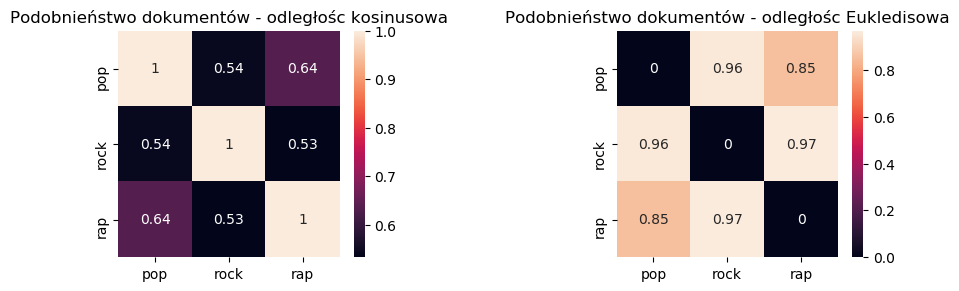

In [25]:
types = ["pop","rock","rap"]

#typ_odleglosci = 'Euklidesowa'
mac_odl_cos = np.empty([3,3])
mac_odl_euk = np.empty([3,3])
for i in range(0,3):
    for j in range(0,3):
        mac_odl_cos[i,j] = distance(tfidf[i],tfidf[j],"Cosinus")
        mac_odl_euk[i,j] = distance(tfidf[i],tfidf[j],'Eukledis')
            
plt.figure(figsize=(10,3),dpi = 100)
plt.subplots_adjust(wspace=0.8,hspace=0.1)
plt.subplot(1,2,1)
plt.title("Podobnieństwo dokumentów - odległośc kosinusowa")
sns.heatmap(pd.DataFrame( mac_odl_cos, index = types, columns = types),annot =  mac_odl_cos)
plt.subplot(1,2,2)
plt.title("Podobnieństwo dokumentów - odległośc Eukledisowa")
sns.heatmap(pd.DataFrame( mac_odl_euk, index = types, columns = types),annot = mac_odl_euk)

In [26]:
#def WhatSongItIs(song)
#x = np.array(w.transform([song]).todense())[0]
#for i in range(0,3):
#    print("\t %s -> % 2.4f" % (types[i],distance(x,s[i])))
        

In [27]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.utils.extmath import density
from sklearn import metrics

## Przygotowanie zbioru uczącego i testowego 

In [28]:
def prepareData(popwords,rockwords,rapwords):
    df = pd.DataFrame(columns= ["type","text","length"])
    for i in popwords:
        df = df.append({"type": "pop","text":i,"length":len(i.split(" "))},ignore_index=True)
    for i in rockwords:
        df = df.append({"type": "rock","text":i,"length":len(i.split(" "))},ignore_index=True)
    for i in rapwords:
        df = df.append({"type": "rap","text":i,"length":len(i.split(" "))},ignore_index=True)
    return df

In [29]:
train_df = prepareData(popwords_Learn,rockwords_Learn,rapwords_Learn)
test_df = prepareData(popwords_Test,rockwords_Test,rapwords_Test)

In [30]:
X_trainTfidf=tfidfVectorizer.transform(train_df['text'])
X_testTfidf=tfidfVectorizer.transform(test_df['text'])


In [31]:
X_trainTmd=tmdVektorizer.transform(train_df['text'])
X_testTmd=tmdVektorizer.transform(test_df['text'])

In [32]:
def TrainAndTestModel(model, X_train, train_genre, X_test, test_genre, metod,metric):
    model.fit(X_train, train_genre)
    print("Dokładność klasyfikacji metodą " +str(metod)+ " z użyciem " + str(metric) +": " + str(model.score(X_test, test_genre)))
    target = test_genre
    predicted = model.predict(X_test)
    print (metrics.classification_report(target, predicted, digits=4))

## Regresja Logistyczna

In [33]:
model = LogisticRegression(class_weight='balanced', dual=False,max_iter=1000)

In [34]:
TrainAndTestModel(model, X_trainTmd ,train_df['type'],X_testTmd, test_df['type'], "Regresji logistycznej","tmd")

Dokładność klasyfikacji metodą Regresji logistycznej z użyciem tmd: 0.5
              precision    recall  f1-score   support

         pop     0.3750    0.1765    0.2400        51
         rap     0.6757    0.4717    0.5556        53
        rock     0.4632    0.8462    0.5986        52

    accuracy                         0.5000       156
   macro avg     0.5046    0.4981    0.4647       156
weighted avg     0.5065    0.5000    0.4668       156



In [35]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "Regresji logistycznej","Tf-idf")

Dokładność klasyfikacji metodą Regresji logistycznej z użyciem Tf-idf: 0.5384615384615384
              precision    recall  f1-score   support

         pop     0.4194    0.2549    0.3171        51
         rap     0.6349    0.7547    0.6897        53
        rock     0.5000    0.5962    0.5439        52

    accuracy                         0.5385       156
   macro avg     0.5181    0.5353    0.5169       156
weighted avg     0.5195    0.5385    0.5193       156



## Metoda Wektorów Nośnych

In [36]:
model = LinearSVC( dual=False,max_iter=10000)

In [37]:
TrainAndTestModel(model, X_trainTmd ,train_df['type'],X_testTmd, test_df['type'], "wektorów nośnych","tmd")


Dokładność klasyfikacji metodą wektorów nośnych z użyciem tmd: 0.48717948717948717
              precision    recall  f1-score   support

         pop     0.4062    0.2549    0.3133        51
         rap     0.6842    0.4906    0.5714        53
        rock     0.4302    0.7115    0.5362        52

    accuracy                         0.4872       156
   macro avg     0.5069    0.4857    0.4736       156
weighted avg     0.5087    0.4872    0.4753       156



In [38]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "wektorów nośnych","Tf-idf")

Dokładność klasyfikacji metodą wektorów nośnych z użyciem Tf-idf: 0.5128205128205128
              precision    recall  f1-score   support

         pop     0.3333    0.1765    0.2308        51
         rap     0.5882    0.7547    0.6612        53
        rock     0.5082    0.5962    0.5487        52

    accuracy                         0.5128       156
   macro avg     0.4766    0.5091    0.4802       156
weighted avg     0.4782    0.5128    0.4830       156



## RidgeClassifier

In [39]:
model = RidgeClassifier()

In [40]:
TrainAndTestModel(model, X_trainTmd ,train_df['type'],X_testTmd, test_df['type'], "Ridge","tmd")

Dokładność klasyfikacji metodą Ridge z użyciem tmd: 0.4807692307692308
              precision    recall  f1-score   support

         pop     0.3810    0.1569    0.2222        51
         rap     0.7188    0.4340    0.5412        53
        rock     0.4272    0.8462    0.5677        52

    accuracy                         0.4808       156
   macro avg     0.5090    0.4790    0.4437       156
weighted avg     0.5111    0.4808    0.4458       156



In [41]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "Ridge","Tf-idf")

Dokładność klasyfikacji metodą Ridge z użyciem Tf-idf: 0.5256410256410257
              precision    recall  f1-score   support

         pop     0.4000    0.1961    0.2632        51
         rap     0.5970    0.7547    0.6667        53
        rock     0.5000    0.6154    0.5517        52

    accuracy                         0.5256       156
   macro avg     0.4990    0.5221    0.4938       156
weighted avg     0.5003    0.5256    0.4964       156



## SGDClassifier

In [42]:
model = SGDClassifier()

In [43]:
TrainAndTestModel(model, X_trainTmd ,train_df['type'],X_testTmd, test_df['type'], "SGDC","tmd")

Dokładność klasyfikacji metodą SGDC z użyciem tmd: 0.4807692307692308
              precision    recall  f1-score   support

         pop     0.3514    0.2549    0.2955        51
         rap     0.5652    0.7358    0.6393        53
        rock     0.4600    0.4423    0.4510        52

    accuracy                         0.4808       156
   macro avg     0.4589    0.4777    0.4619       156
weighted avg     0.4602    0.4808    0.4641       156



In [44]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "SGDC","Tf-idf")

Dokładność klasyfikacji metodą SGDC z użyciem Tf-idf: 0.4935897435897436
              precision    recall  f1-score   support

         pop     0.3962    0.4118    0.4038        51
         rap     0.5862    0.6415    0.6126        53
        rock     0.4889    0.4231    0.4536        52

    accuracy                         0.4936       156
   macro avg     0.4904    0.4921    0.4900       156
weighted avg     0.4917    0.4936    0.4914       156



## PassiveAggressiveClassifier

In [45]:
model =PassiveAggressiveClassifier()

In [46]:
TrainAndTestModel(model, X_trainTmd ,train_df['type'],X_testTmd, test_df['type'], "PassiveAggressive","tmd")

Dokładność klasyfikacji metodą PassiveAggressive z użyciem tmd: 0.4807692307692308
              precision    recall  f1-score   support

         pop     0.3548    0.2157    0.2683        51
         rap     0.5862    0.6415    0.6126        53
        rock     0.4478    0.5769    0.5042        52

    accuracy                         0.4808       156
   macro avg     0.4629    0.4780    0.4617       156
weighted avg     0.4644    0.4808    0.4639       156



In [47]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "PassiveAggressive","Tf-idf")

Dokładność klasyfikacji metodą PassiveAggressive z użyciem Tf-idf: 0.5064102564102564
              precision    recall  f1-score   support

         pop     0.3529    0.2353    0.2824        51
         rap     0.5634    0.7547    0.6452        53
        rock     0.5294    0.5192    0.5243        52

    accuracy                         0.5064       156
   macro avg     0.4819    0.5031    0.4839       156
weighted avg     0.4833    0.5064    0.4863       156



## BernoulliNB

In [48]:
model = BernoulliNB()

In [49]:
TrainAndTestModel(model, X_trainTmd ,train_df['type'],X_testTmd, test_df['type'], "BernoulliNB","tmd")

Dokładność klasyfikacji metodą BernoulliNB z użyciem tmd: 0.3974358974358974
              precision    recall  f1-score   support

         pop     0.2222    0.1176    0.1538        51
         rap     1.0000    0.1132    0.2034        53
        rock     0.4065    0.9615    0.5714        52

    accuracy                         0.3974       156
   macro avg     0.5429    0.3975    0.3096       156
weighted avg     0.5479    0.3974    0.3099       156



In [50]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "BernoulliNB","Tf-idf")

Dokładność klasyfikacji metodą BernoulliNB z użyciem Tf-idf: 0.3974358974358974
              precision    recall  f1-score   support

         pop     0.2222    0.1176    0.1538        51
         rap     1.0000    0.1132    0.2034        53
        rock     0.4065    0.9615    0.5714        52

    accuracy                         0.3974       156
   macro avg     0.5429    0.3975    0.3096       156
weighted avg     0.5479    0.3974    0.3099       156



## MultinomialNB

In [51]:
model = MultinomialNB()

In [52]:
TrainAndTestModel(model, X_trainTmd ,train_df['type'],X_testTmd, test_df['type'], "MultinomialNB","tmd")

Dokładność klasyfikacji metodą MultinomialNB z użyciem tmd: 0.5576923076923077
              precision    recall  f1-score   support

         pop     0.4630    0.4902    0.4762        51
         rap     0.6212    0.7736    0.6891        53
        rock     0.5833    0.4038    0.4773        52

    accuracy                         0.5577       156
   macro avg     0.5558    0.5559    0.5475       156
weighted avg     0.5569    0.5577    0.5489       156



In [53]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "MultinomialNB","Tf-idf")

Dokładność klasyfikacji metodą MultinomialNB z użyciem Tf-idf: 0.4423076923076923
              precision    recall  f1-score   support

         pop     0.2308    0.0588    0.0938        51
         rap     0.4068    0.9057    0.5614        53
        rock     0.7200    0.3462    0.4675        52

    accuracy                         0.4423       156
   macro avg     0.4525    0.4369    0.3742       156
weighted avg     0.4536    0.4423    0.3772       156



## KNeighborsClassifier

In [54]:
model = KNeighborsClassifier()

In [55]:
TrainAndTestModel(model, X_trainTmd ,train_df['type'],X_testTmd, test_df['type'], "KNeighborsClassifier","tmd")

Dokładność klasyfikacji metodą KNeighborsClassifier z użyciem tmd: 0.3525641025641026
              precision    recall  f1-score   support

         pop     0.3333    0.0196    0.0370        51
         rap     0.8000    0.0755    0.1379        53
        rock     0.3378    0.9615    0.5000        52

    accuracy                         0.3526       156
   macro avg     0.4904    0.3522    0.2250       156
weighted avg     0.4934    0.3526    0.2256       156



In [56]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "KNeighborsClassifier","Tf-idf")

Dokładność klasyfikacji metodą KNeighborsClassifier z użyciem Tf-idf: 0.48717948717948717
              precision    recall  f1-score   support

         pop     0.4583    0.4314    0.4444        51
         rap     0.4828    0.7925    0.6000        53
        rock     0.5714    0.2308    0.3288        52

    accuracy                         0.4872       156
   macro avg     0.5042    0.4849    0.4577       156
weighted avg     0.5043    0.4872    0.4587       156



## NearestCentroid

In [57]:
model = NearestCentroid()

In [58]:
TrainAndTestModel(model, X_trainTmd ,train_df['type'],X_testTmd, test_df['type'], "NearestCentroid","tmd")

Dokładność klasyfikacji metodą NearestCentroid z użyciem tmd: 0.5128205128205128
              precision    recall  f1-score   support

         pop     0.3529    0.1176    0.1765        51
         rap     0.7714    0.5094    0.6136        53
        rock     0.4519    0.9038    0.6026        52

    accuracy                         0.5128       156
   macro avg     0.5254    0.5103    0.4642       156
weighted avg     0.5281    0.5128    0.4670       156



In [59]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "NearestCentroid","Tf-idf")

Dokładność klasyfikacji metodą NearestCentroid z użyciem Tf-idf: 0.5384615384615384
              precision    recall  f1-score   support

         pop     0.4146    0.3333    0.3696        51
         rap     0.6441    0.7170    0.6786        53
        rock     0.5179    0.5577    0.5370        52

    accuracy                         0.5385       156
   macro avg     0.5255    0.5360    0.5284       156
weighted avg     0.5270    0.5385    0.5304       156



## Perceptron

In [60]:
model  = Perceptron()

In [61]:
TrainAndTestModel(model, X_trainTmd ,train_df['type'],X_testTmd, test_df['type'], "NearestCentroid","tmd")

Dokładność klasyfikacji metodą NearestCentroid z użyciem tmd: 0.5064102564102564
              precision    recall  f1-score   support

         pop     0.4074    0.4314    0.4190        51
         rap     0.5316    0.7925    0.6364        53
        rock     0.6522    0.2885    0.4000        52

    accuracy                         0.5064       156
   macro avg     0.5304    0.5041    0.4851       156
weighted avg     0.5312    0.5064    0.4865       156



In [62]:
TrainAndTestModel(model, X_trainTfidf ,train_df['type'],X_testTfidf, test_df['type'], "NearestCentroid","Tf-idf")

Dokładność klasyfikacji metodą NearestCentroid z użyciem Tf-idf: 0.5
              precision    recall  f1-score   support

         pop     0.3571    0.2941    0.3226        51
         rap     0.5443    0.8113    0.6515        53
        rock     0.5714    0.3846    0.4598        52

    accuracy                         0.5000       156
   macro avg     0.4910    0.4967    0.4780       156
weighted avg     0.4922    0.5000    0.4801       156



## Wykresy

In [63]:
def words(songs):
    words = []
    punctuation = ["!",",", ".",'"', ":", ";", "?" ,"(",")","—","–","-", "*","”","“","&"
                   "»","…","«","—","[","]","1","2","3","4"] 
    stopWords = get_stop_words('english')
    stopWords.append("pre-chorus")
    stopWords.append ("verse")
    stopWords.append("post-chorus")
    stopWords.append("weren't") 
    stopWords.append("is's")
    stopWords.append("that’s")
    for song in songs:
        song = song.lower()
        for sign in punctuation:
             song = song.replace(sign,"")
                
        w = []            
        for word in song.split():
            if not(word in stopWords):
                word = word.replace("’","")
                word =word.replace("'","")
                word = lemmatizer.lemmatize(word)
                w.append(word)
        words.append(w)
                
    return  words

In [64]:
popwords = words(popsongs)
rockwords = words(rocksongs)
rapwords = words(rapsongs)

In [65]:
def createDicionary(words):
    dic = {}
    for word in sorted(words):
        if word in  dic.keys():
             dic[word] =  dic[word] + 1
        else:
             dic[word] = 1
    return  dic

In [66]:
def CreateData(popwords,rockwords,rapwords):
    pop = []
    for subList in popwords:
        pop += subList

    rock = []
    for subList in rockwords:
        rock += subList

    rap = []
    for subList in rapwords:
        rap += subList    

    return [ pop,rock,rap] 

In [67]:
[pop,rock,rap] = CreateData(popwords,rockwords,rapwords)

In [68]:
pop_Dict = createDicionary(pop)
rock_Dict = createDicionary(rock)
rap_Dict = createDicionary(rap)

In [69]:
pop_Dict = sorted(pop_Dict.items(), key=lambda x: x[1], reverse=True)
rock_Dict = sorted(rock_Dict.items(), key=lambda x: x[1], reverse=True)
rap_Dict = sorted(rap_Dict.items(), key=lambda x: x[1], reverse=True)

In [70]:
def drawDiagram(data,title):
    labels = [item[0] for item in data]
    sizes= [item[1] for item in data]
    plt.figure(figsize=(5,5),dpi = 100)
    plt.subplots_adjust(wspace=0.8,hspace=0.5)
    plt.title(title,pad=20)
    plt.pie(sizes, labels=labels)

    plt.axis('equal')
    plt.show()

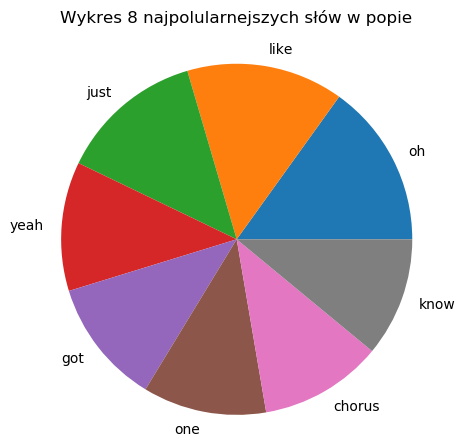

In [71]:
drawDiagram( pop_Dict[0:8],"Wykres 8 najpolularnejszych słów w popie")

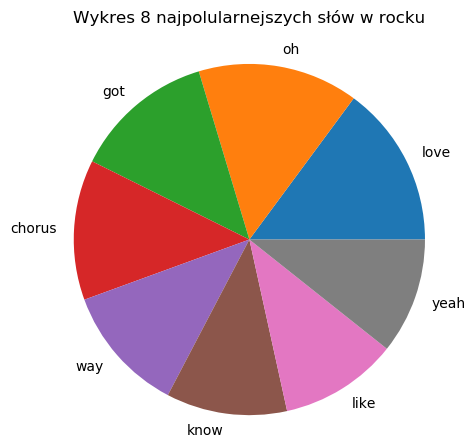

In [72]:
drawDiagram(rock_Dict[0:8],"Wykres 8 najpolularnejszych słów w rocku")

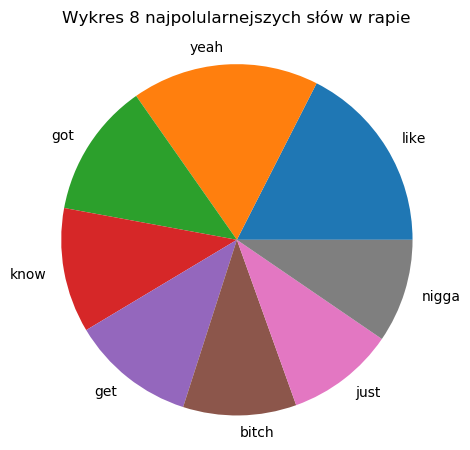

In [73]:
drawDiagram(rap_Dict[0:8],"Wykres 8 najpolularnejszych słów w rapie")